### Build solutions


$\frac{dC}{dt}=V_c+W_c+MX_m-C(O_c+P_c)$

$\frac{dM}{dt}=W_m-MX_m$

$\frac{dN}{dt}=W_n+NO_n$

$\frac{dW}{dt}=V_w+E_w+2MX_m-WR_w$

$C(0)=C_0$

$M(0)=M_0$

$N(0)=N_0$

$W(0)=W_0$

### Define dimensionless variables

$t = [t]t*$

$C = [C]C*$

$M = [M]M*$

$N = [N]N*$

$W = [W]W*$

### Substitute into equation

$\frac{[C]}{[t]}\frac{dC^*}{dt^*}=V_c+W_c+[M]M^*X_m-[C]C^*(O_c+P_c)$

$\frac{[M]}{[t]}\frac{dM^*}{dt^*}=W_m-[M]M^*X_m$

$\frac{[N]}{[t]}\frac{dN^*}{dt^*}=W_n+[N]N^*O_n$

$\frac{[W]}{[t]}\frac{dW^*}{dt^*}=V_w+E_w+2[M]M^*X_m-[W]W^*R_w$

$[C]C^*(0)=C_0$

$[M]M^*(0)=M_0$

$[N]N^*(0)=N_0$

$[W]W^*(0)=W_0$

### Divide all the equations by the coefficients of the highest order polynomial or derivative term.

$\frac{dC^*}{dt^*}=\frac{[t]}{[C]}(V_c+W_c+[M]M^*X_m)-[t]C^*(O_c+P_c)$

$\frac{dM^*}{dt^*}=\frac{[t]}{[M]}W_m-[t]M^*X_m$

$\frac{dN^*}{dt^*}=\frac{[t]}{[N]}W_n+[t]N^*O_n$

$\frac{dW^*}{dt^*}=\frac{[t]}{[W]}(V_w+E_w+2[M]MX_m)-[t]W^*R_w$

$C^*(0)=\frac{C_0}{[C]}$

$M^*(0)=\frac{M_0}{[M]}$

$N^*(0)=\frac{N_0}{[N]}$

$W^*(0)=\frac{W_0}{[W]}$

### Choose a scaling factor for each variable

$[t]=\frac{1}{V_c+W_c+[M]X_m}$

$[t]=\frac{1}{O_c+P_c}$

$[t]=\frac{1}{W_m}$

$[t]=\frac{1}{X_m}$

$[t]=\frac{1}{W_n}$

$[t]=\frac{1}{O_n}$

$[t]=\frac{1}{V_w+E_w+2MX_m}$

$[t]=\frac{1}{R_w}$

We'll choose $[t]=\frac{1}{O_c+P_c}$ because we will assume plant and ocean CO2 absorption is never zero.

### Rewrite the equations

$\frac{dC^*}{dt^*}=\frac{1}{[C](O_c+P_c)}(V_c+W_c)+\frac{[M]M^*X_m}{[C](O_c+P_c)}-C^*$

$\frac{dM^*}{dt^*}=\frac{1}{[M](O_c+P_c)}W_m-\frac{1}{O_c+P_c}M^*X_m$

$\frac{dN^*}{dt^*}=\frac{1}{[N](O_c+P_c)}W_n+\frac{1}{O_c+P_c}N^*O_n$

$\frac{dW^*}{dt^*}=\frac{1}{[W](O_c+P_c)}(V_w+E_w)+\frac{2[M]M^*X_m}{[W](O_c+P_c)}-\frac{1}{O_c+P_c}W^*R_w$

Let $[C]=\frac{V_c+W_c}{O_c+P_c}$

$[M]=\frac{W_m}{O_c+P_c}$

$[N]=\frac{W_n}{O_c+P_c}$

$[W]=\frac{V_w+E_w}{O_c+P_c}$

$\frac{dC^*}{dt^*}=1+\frac{W_mX_m}{(V_c+W_c)(O_c+P_c)}M^*-C^*$

$\frac{dM^*}{dt^*}=1-\frac{X_m}{O_c+P_c}M^*$

$\frac{dN^*}{dt^*}=1-\frac{O_n}{O_c+P_c}N^*$

$\frac{dW^*}{dt^*}=1+\frac{2W_mX_m}{(V_w+E_w)(O_c+P_c)}M^*-\frac{1}{O_c+P_c}W^*R_w$

Let $\alpha = \frac{W_mX_m}{(V_c+W_c)(O_c+P_c)}$

$\beta = \frac{X_m}{O_c+P_c}$

$\gamma = \frac{O_n}{O_c+P_c}$

$\delta = \frac{2W_mX_m}{(V_w+E_w)(O_c+P_c)}$

$\epsilon = \frac{R_w}{O_c+P_c}$

In [87]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [177]:
# u[0] = C*, u[1] = M*, u[2] = N*, u[3] = W*
def f(u, t):
    dudt = np.zeros(4)
    dudt[0] = 1 + alpha * u[1] - u[0]
    dudt[1] = 1 - beta * u[1]
    dudt[2] = 1 + gamma * u[2]
    dudt[3] = 1 + delta * u[1] - epsilon * u[3]
    return dudt

In [179]:
# Parameter values
Vc = 0.036
Wc = 0.2
Oc = 0.00288
Pc = 0.08

Wm = 0.00458
Xm = 1 / 12

Wn = 0.00004
On = 0.1

Vw = 0.2
Ew = 25.291
Rw = 24.233

C0 = 422.9
M0 = 1.92
N0 = 0.33
W0 = 4000

In [181]:
Cb = (Vc + Wc) / (Oc + Pc)
Mb = Wm / (Oc + Pc)
Nb = Wn / (Oc + Pc)
Wb = (Vw + Ew) / (Oc + Pc)

alpha = Xm * Mb / (Vc + Wc)
beta = Xm / (Oc + Pc)
gamma = On / (Oc + Pc)
delta = 2 * Xm * Mb / (Vw + Ew)
epsilon = Rw / (Oc + Pc)

Ci = C0 / Cb
Mi = M0 / Mb
Ni = N0 / Nb
Wi = W0 / Wb

In [183]:
t = np.linspace(0, 50, 100)
u0 = [Ci, Mi, Ni, Wi]
u = spi.odeint(f, u0, t)

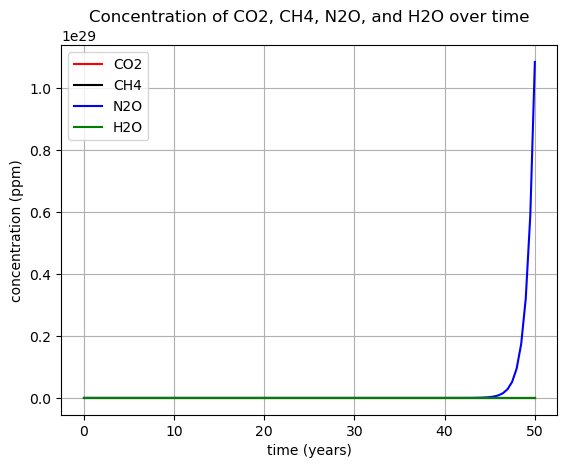

In [201]:
plt.plot(t, u[:, 0], 'r')
plt.plot(t, u[:, 1], 'k')
plt.plot(t, u[:, 2], 'b')
plt.plot(t, u[:, 3], 'g')
plt.title('Concentration of CO2, CH4, N2O, and H2O over time')
plt.xlabel('time (years)')
plt.ylabel('concentration (ppm)')
plt.legend(['CO2', 'CH4', 'N2O', 'H2O'])
plt.grid(True)
plt.show()